# News Publishers Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [2]:
# Loading data and Previewing some of the data
df = pd.read_csv('../Data/raw_analyst_ratings.csv')


print(df.head())
print(df.tail())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [3]:
 #Counting the number of articles per publisher and displaying the top publishers
publisher_counts = df['publisher'].value_counts()


print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


## Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_11268\2233488353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")


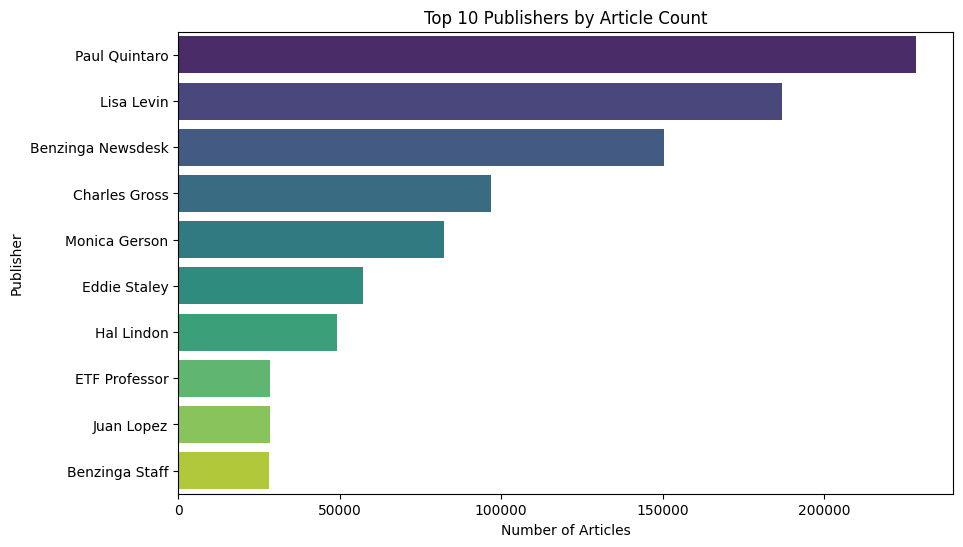

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers by Article Count")
plt.show()

### Email Domain Analysis

In [16]:
# Define a function to extract the domain if the publisher is an email
def extract_domain(publisher):
    if '@' in publisher:  
        return publisher.split('@')[-1]  # Extracting the domain part from the email address
    else:
        return None  

# Apply the function to the 'publisher' column to create a new 'domain' column
df['domain'] = df['publisher'].apply(extract_domain)
email_domains_df = df.dropna(subset=['domain'])

# Counting and displaying the number of articles per domain
domain_counts = email_domains_df['domain'].value_counts()
print(domain_counts.head(10))


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


# Time Series Analysis

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Set 'date' as the index
df.set_index('date', inplace=True)

In [26]:
# Resample to daily frequency and count number of articles
daily_articles = df.resample('D').size()
daily_articles.head()



date
2020-06-07 00:00:00-04:00     25
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Freq: D, dtype: int64

In [27]:
daily_articles.tail()

date
2020-06-07 00:00:00-04:00     25
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Freq: D, dtype: int64

In [28]:
print(daily_articles.describe())

count    3334.000000
mean       16.792741
std        60.088398
min         0.000000
25%         1.000000
50%         5.000000
75%        14.000000
max       973.000000
dtype: float64


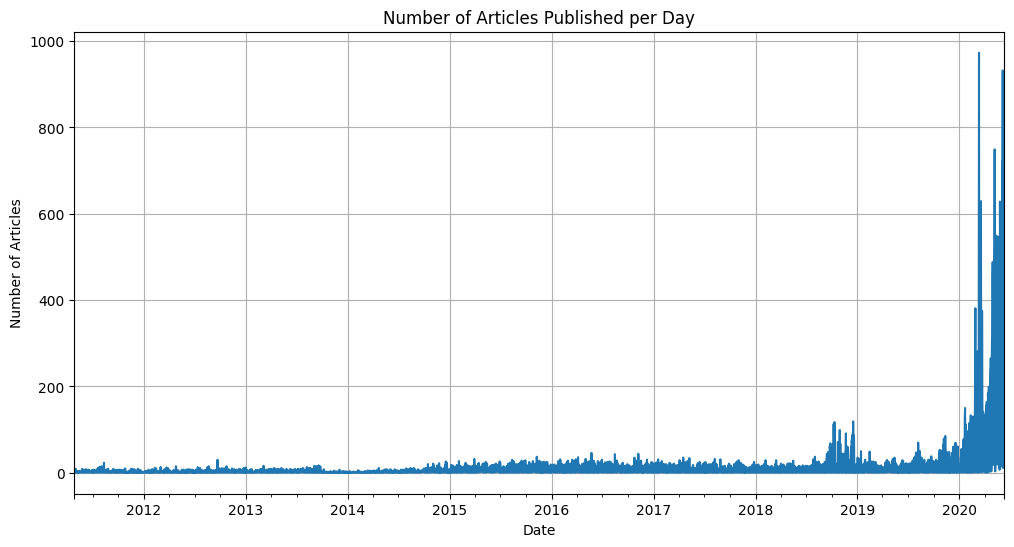

In [22]:
# the number of articles per day
daily_articles = df.resample('D').size()
plt.figure(figsize=(12, 6))
daily_articles.plot()
plt.title('Number of Articles Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [1]:
# Decompose the time series
decomposition = seasonal_decompose(daily_articles, model='additive')  # or 'multiplicative'
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(daily_articles, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

NameError: name 'seasonal_decompose' is not defined